Jared Crebo 30085839

PHYS 381: Assignment 5

Curve fitting, optimizations, and finite difference methods

Kernel: Python 3.10.11 | IDE: Visual Studio Code

2 Curve fitting using scipy.optimize package

Best fit parameters: [1.46593302 0.36441999]
Chi-squared: 0.9005044224711577


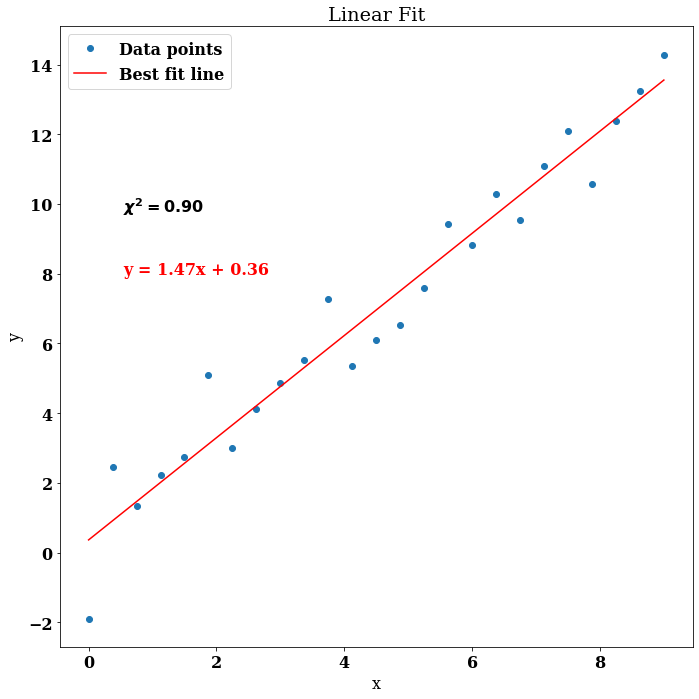

In [ ]:
import numpy as np
import scipy.optimize as so
import matplotlib.pyplot as plt
import matplotlib

# Set the font to serif and bold
font = {'family': 'serif', 'weight': 'bold', 'size': 16}
matplotlib.rc('font', **font)

# Load data from the text file
# The file should contain two columns: x and y values
data = np.loadtxt('data_points_assign5.txt')
x = data[:, 0]
y = data[:, 1]

# Define the linear model
def linear_model(x, param):
    '''for input slope and intercept return $y= m x + b$'''
    slope, intercept = param
    result = slope*x + intercept
    return result

# Define the exponential model
def exp_model(x, param):
    '''for input m and b return $y= m e^{-bx}$'''
    slope, intercept = param
    result = slope * np.exp(-intercept * x)
    return result

# Define the quadratic model
def quad_model(x, param):
    '''for input m and R return $y= mRx^{2}$'''
    m, r = param
    result = m * r * x**2
    return result

# Define the chi-squared function
def chi_squared_n(params, x, y, model = 'linear', uncertainty = 1):
    # params: list of parameters for the model
    # x: independent variable data
    # y: dependent variable data
    # model: type of model to fit ('linear', 'exp', 'quad')
    # uncertainty: uncertainty in the y data (default is 1)
    # Calculate the expected y values based on the model and parameters

    if model == 'linear':
        expected = linear_model(x, params)
    elif model == 'exp':
        expected = exp_model(x, params)
    elif model == 'quad':
        expected = quad_model(x, params)
    
    observed = y
    chi2 = np.sum((expected - observed)**2 / uncertainty**2)
    return chi2 / (len(observed) - 1)

# Initial guesses
slope = 1
intercept = 0

# Perform the fit using the linear model
# The initial guess for the parameters is [intercept, slope]
# The method used is Nelder-Mead
min_chi2 = so.minimize(chi_squared_n, [intercept, slope], args=(x, y), method='Nelder-Mead')
print('Best fit parameters:', min_chi2.x)
print('Chi-squared:', min_chi2.fun)

# Plot the data and the best fit line
fig, ax = plt.subplots(figsize = [10,10])
ax.plot(x, y, 'o', label='Data points')
ax.plot(x, linear_model(x, min_chi2.x), 'r-', label='Best fit line')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Linear Fit')
ax.legend(fontsize=16)
ax.text(0.1, 0.7, f'$\chi^2 = {min_chi2.fun:.2f}$', fontsize=16, transform=ax.transAxes)
ax.text(0.1, 0.6, f'y = {min_chi2.x[0]:.2f}x + {min_chi2.x[1]:.2f}', fontsize=16, transform=ax.transAxes, color='red')
fig.tight_layout()

b) The Linear Fit plot shows the datapoints have been fit by a linear model to minimize the $\chi^{2}_{N}$ using the SciPy Optimize package. This is more robust than sweeping a range of intercepts and slopes and is more applicable for cases where you may not know the range of slopes or intercepts. 

Best fit parameters: [2.29263069 0.49627424]
Chi-squared: 0.07849930071734192


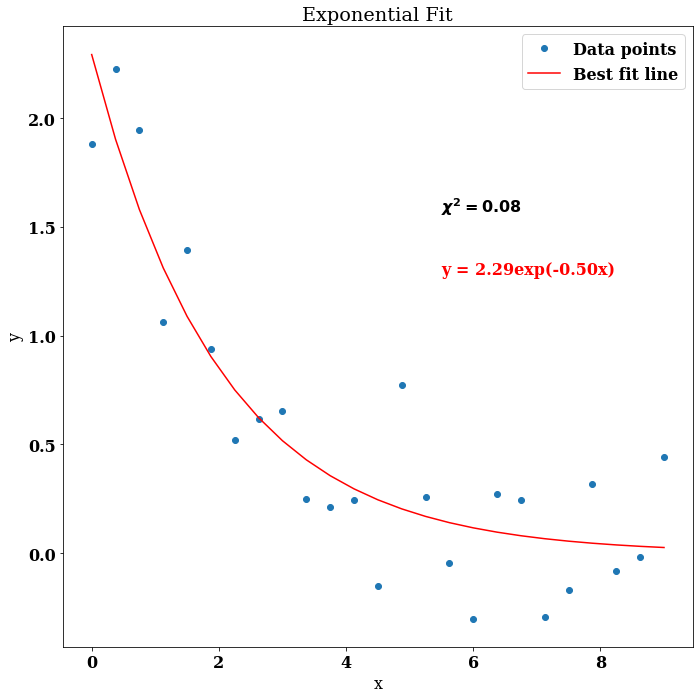

In [ ]:
# Load data from the text file for exponential fit
# The file should contain two columns: x and y values
data = np.loadtxt('data_points_exp_assign5.txt')
x = data[:, 0]
y = data[:, 1]

# Initial guesses
slope = 1
intercept = 0

# Perform the fit using the exponential model
# The initial guess for the parameters is [intercept, slope]
# The method used is Nelder-Mead
min_chi2 = so.minimize(chi_squared_n, [intercept, slope], args=(x, y, 'exp'), method='Nelder-Mead')
print('Best fit parameters:', min_chi2.x)
print('Chi-squared:', min_chi2.fun)

# Plot the data and the best fit line
fig, ax = plt.subplots(figsize = [10,10])
ax.plot(x, y, 'o', label='Data points')
ax.plot(x, exp_model(x, min_chi2.x), 'r-', label='Best fit line')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Exponential Fit')
ax.legend(fontsize=16)
ax.text(0.6, 0.7, f'$\chi^2 = {min_chi2.fun:.2f}$', fontsize=16, transform=ax.transAxes)
ax.text(0.6, 0.6, f'y = {min_chi2.x[0]:.2f}exp(-{min_chi2.x[1]:.2f}x)', fontsize=16, transform=ax.transAxes, color='red')
fig.tight_layout()

c) The Exponential Fit plot uses the exact same methods as in part b) but instead uses an exponential model to fit to a nonlinear set of datapoints ($y = De^{-bx}$). The line of best fit again obtains the valeus D and b that minimizes $\chi^{2}_{N}$ using SciPy Optimize. 

Best fit parameters: [1.65611638e+03 2.44392646e-01]
Chi-squared: 732.4771145215944
t_half = 2.84


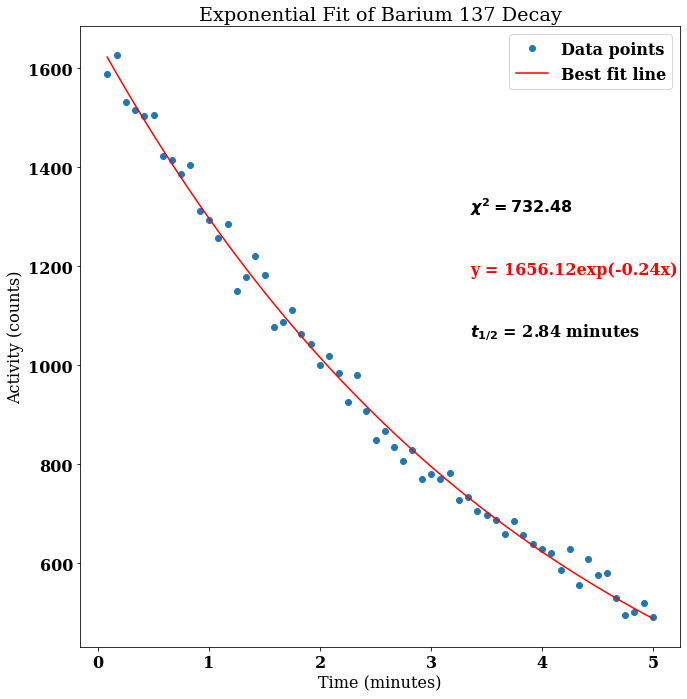

In [ ]:
# Load data from the text file for decay fit
# The file should contain two columns: x and y values
data = np.loadtxt('decay.txt')
x = data[:, 0]
y = data[:, 1]

# Perform the fit using the exponential model
# The initial guess for the parameters is [intercept, slope]
# The method used is Nelder-Mead
min_chi2 = so.minimize(chi_squared_n, [intercept, slope], args=(x, y, 'exp'), method='Nelder-Mead')
print('Best fit parameters:', min_chi2.x)
print('Chi-squared:', min_chi2.fun)

# Calculate the half-life from the decay constant
tau =  1/min_chi2.x[1]
half_life = np.log(2) * tau
print(f't_half = {half_life:.2f}')

# Plot the data and the best fit line
fig, ax = plt.subplots(figsize = [10,10])
ax.plot(x, y, 'o', label='Data points')
ax.plot(x, exp_model(x, min_chi2.x), 'r-', label='Best fit line')
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Activity (counts)')
ax.set_title('Exponential Fit of Barium 137 Decay')
ax.legend(fontsize=16)
ax.text(0.65, 0.7, f'$\chi^2 = {min_chi2.fun:.2f}$', fontsize=16, transform=ax.transAxes)
ax.text(0.65, 0.6, f'y = {min_chi2.x[0]:.2f}exp(-{min_chi2.x[1]:.2f}x)', fontsize=16, transform=ax.transAxes, color='red')
ax.text(0.65, 0.5, r'$t_{1/2}$ = '+f'{half_life:.2f} minutes', fontsize=16, transform=ax.transAxes)
fig.tight_layout()

d) Barium 137 decays in the form $N = N_{0}exp(-t/\tau)$ where $t_{1/2} = \tau ln(2). Using the same exponential fitting method as in part c) the exponential fit can be determined. From this equation, the half life of Barium 137 can be calculated based off of the fit of the dataset. This is calculated to be 2.84 minutes. 

Best fit parameters: [0.0453491  0.72924829]
Chi-squared: 0.38404308334992054


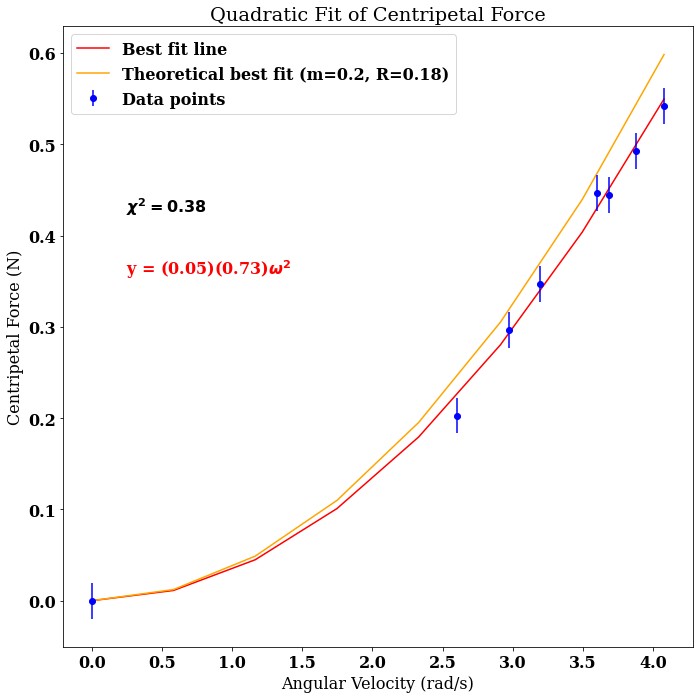

In [ ]:
# Load data from the text file for centripetal force fit
# The file should contain three columns: x, y and error values
data = np.loadtxt('centripetal.txt')
x = data[:, 0]
y = data[:, 1]
error = data[:, 2]

# Perform the fit using the quadratic model
# The initial guess for the parameters is [intercept, slope]
# The method used is Nelder-Mead
min_chi2 = so.minimize(chi_squared_n, [intercept, slope], args=(x, y, 'quad', error), method='Nelder-Mead')
print('Best fit parameters:', min_chi2.x)
print('Chi-squared:', min_chi2.fun)

# Plot the data and the best fit line
fig, ax = plt.subplots(figsize = [10,10])
x_plot = np.linspace(0, max(x), len(x))
ax.plot(x_plot, quad_model(x_plot, min_chi2.x), color = 'red', label='Best fit line')
ax.plot(x_plot, quad_model(x_plot, (0.2, 0.18)), color = 'orange', label='Theoretical best fit (m=0.2, R=0.18)')
ax.errorbar(x, y, yerr=error, fmt='o', label='Data points', color='blue')
ax.set_xlabel('Angular Velocity (rad/s)')
ax.set_ylabel('Centripetal Force (N)')
ax.set_title('Quadratic Fit of Centripetal Force')
ax.legend(fontsize=16)
ax.text(0.1, 0.7, f'$\chi^2 = {min_chi2.fun:.2f}$', fontsize=16, transform=ax.transAxes)
ax.text(0.1, 0.6, f'y = ({min_chi2.x[0]:.2f})({min_chi2.x[1]:.2f})'+r'$\omega^{2}$', fontsize=16, transform=ax.transAxes, color='red')
fig.tight_layout()

e) The equation of centripetal force is modelled as a quadratic equation $F_{c} = mR\omega^{2}$ where m is the mass, R is the radius, and $\omega$ is the angular velocity. A quadratic line of best fit is developed using this model and SciPy Optimize to minimize the $\chi^{2}_{N}$. The actual mass is 0.2 kg and the actual radius is 0.18 cm. The theoretical line of best fit based on this mass and radius is plotted next to the numerically determined line of best fit based on the dataset. 

* The quadratic model for $F_{c}$ fits the data very well with $\chi^{2}_{N} = 0.38$. 

* Plotting the theoretical line of best fit using m = 0.2 kg and R = 0.18 cm does not give a best fit line, indicating a discrepancy between theoretical and experimental data. 